In [1]:
import os
data_set_dir = 'G:/cvpr dataset/Face Mask Dataset'
train_data_dir = os.path.join(data_set_dir, 'Train' )
test_data_dir = os.path.join(data_set_dir, "Test")
validation_data_dir = os.path.join(data_set_dir, "Validation")

In [2]:
CATEGORIES = []
for i in os.listdir(train_data_dir):
  CATEGORIES.append(i)
print(CATEGORIES)

['WithMask', 'WithoutMask']


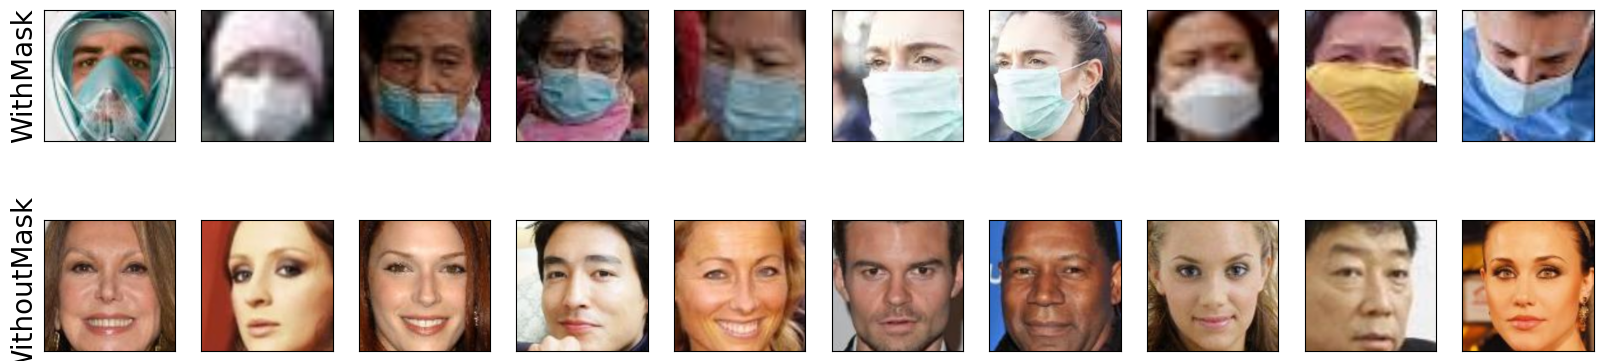

In [3]:
import matplotlib.pyplot as plt
import cv2
i = 0
plt.figure(figsize=(20,5))
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    plt.subplot(2,10,i+1)
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    # img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BRG2RGB)
    plt.imshow(img_arr)
    if i%10 ==0:
      plt.ylabel(c, size=20)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i%10 == 0:
      break

plt.show()

In [4]:
train_data = []
i = 0;
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    train_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
    if i % 1000 == 0:
      break
print(len(train_data))

2000


In [5]:
valid_data = []
i = 0;
for c in CATEGORIES:
  path = os.path.join(validation_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    valid_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
    if i % 200 == 0:
      break
print(len(valid_data))

400


In [6]:
test_data = []
i = 0;
for c in CATEGORIES:
  path = os.path.join(test_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    test_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
    if i % 200 == 0:
      break
print(len(test_data))

400


In [7]:
import random
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(valid_data)

In [8]:
import numpy as np

In [9]:
X_train = []
Y_train = []
i = 0
for img, label in train_data:
  X_train.append(img)
  Y_train.append(label)
X_train = (np.array(X_train)*255).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)
print(X_train.shape, Y_train.shape)

(2000, 227, 227, 3) (2000,)


In [10]:
X_valid = []
Y_valid = []
for img, label in valid_data:
  X_valid.append(img)
  Y_valid.append(label)
X_valid = (np.array(X_valid)*255).astype('float32').reshape(-1,227,227,3)
Y_valid = np.array(Y_valid)

print(X_valid.shape, Y_valid.shape)

(400, 227, 227, 3) (400,)


In [11]:
X_test = []
Y_test = []
for img, label in test_data:
  X_test.append(img)
  Y_test.append(label)
X_test = (np.array(X_test)*255).astype('float32').reshape(-1,227,227,3)
Y_test = np.array(Y_test)

print(X_test.shape, Y_test.shape)

(400, 227, 227, 3) (400,)


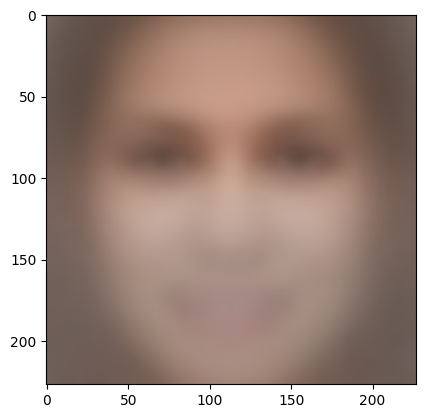

In [12]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    layers.Conv2D(filters=96, kernel_size=(11,11),strides=(4,4), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(5,5),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation='sigmoid')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                        

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [17]:
h = model.fit(x=X_train, y=Y_train, epochs=50, batch_size=64, validation_data=(X_valid, Y_valid))

Epoch 1/50
32/32 [==============================] - 351s 7s/step - loss: 0.3404 - accuracy: 0.8410 - val_loss: 0.7159 - val_accuracy: 0.5000
Epoch 2/50
32/32 [==============================] - 119s 4s/step - loss: 0.1206 - accuracy: 0.9525 - val_loss: 0.5465 - val_accuracy: 0.5725
Epoch 3/50
32/32 [==============================] - 121s 4s/step - loss: 0.0736 - accuracy: 0.9730 - val_loss: 0.3542 - val_accuracy: 0.8700
Epoch 4/50
32/32 [==============================] - 121s 4s/step - loss: 0.0461 - accuracy: 0.9830 - val_loss: 0.2148 - val_accuracy: 0.9600
Epoch 5/50
32/32 [==============================] - 120s 4s/step - loss: 0.0385 - accuracy: 0.9905 - val_loss: 0.1508 - val_accuracy: 0.9575
Epoch 6/50
32/32 [==============================] - 119s 4s/step - loss: 0.0291 - accuracy: 0.9900 - val_loss: 0.0914 - val_accuracy: 0.9725
Epoch 7/50
32/32 [==============================] - 119s 4s/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0669 - val_accuracy: 0.9825
Epoch 8/50
32

In [18]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 5s 357ms/step - loss: 0.0834 - accuracy: 0.9700


[0.08340664952993393, 0.9700000286102295]

In [19]:
model.save('G:/cvpr dataset/Face Mask Dataset/model.h5')

C:\Users\Emon\miniconda3\envs\cvpr\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
